In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-housing-market/NY-House-Dataset.csv


# Summary of the dataset

This dataset offers comprehensive information on New York house prices, offering valuable insights into the local real estate market. It includes details such as broker titles, house types, prices, bedroom and bathroom counts etc.

# Goal

Here we will try to find out answer of following questions
* Analyze the distribution of house prices to understand market trends
* Explore the relationship between property square footage and prices to assess the value of different-sized houses.
* Analyze the impact of the number of bedrooms and bathrooms on house prices.
* Investigate geographical patterns to identify areas with higher or lower property prices.

We'll craft an interactive Power BI dashboard to provide a comprehensive overview of city housing market trends at a glance.

**This Notebook will cover the following:**

1. Data Acquisition

2. Data Preparation & Manupulation
 
3. Exploratory Data Analysis

4. Data Visualization in Power BI

# 1. Data Acquisition

In [2]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("/kaggle/input/new-york-housing-market/NY-House-Dataset.csv")
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [3]:
#information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [4]:
# unique value of each column
df.nunique()

BROKERTITLE                    1036
TYPE                             13
PRICE                          1274
BEDS                             27
BATH                             22
PROPERTYSQFT                   1445
ADDRESS                        4582
STATE                           308
MAIN_ADDRESS                   4583
ADMINISTRATIVE_AREA_LEVEL_2      29
LOCALITY                         11
SUBLOCALITY                      21
STREET_NAME                     174
LONG_NAME                      2731
FORMATTED_ADDRESS              4550
LATITUDE                       4196
LONGITUDE                      4118
dtype: int64

In [5]:
# description of the data
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


# 2. Data Preparation & Manupulation

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PRICE', ylabel='Count'>

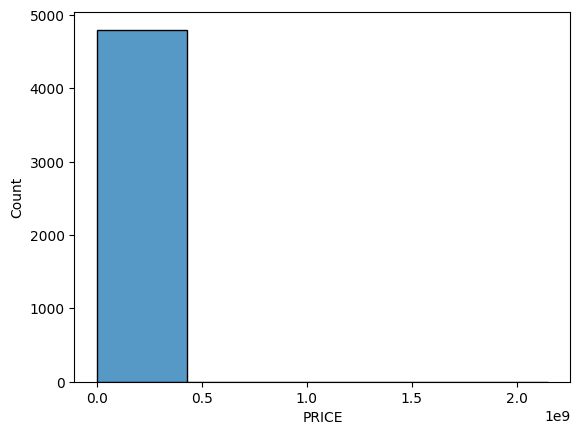

In [6]:
# checking price distribution 
sns.histplot(data=df,x='PRICE',bins=5)

<Axes: xlabel='PRICE'>

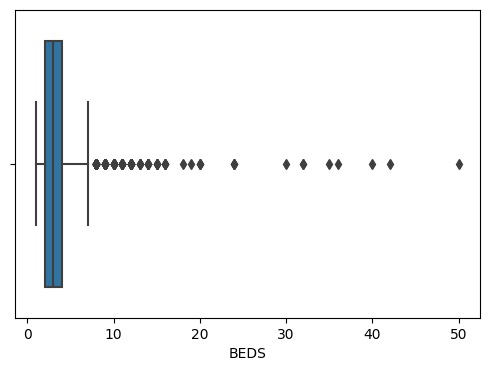

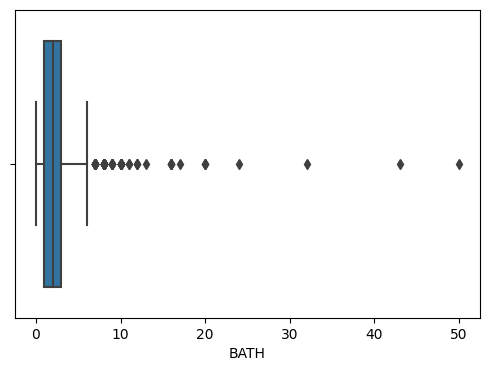

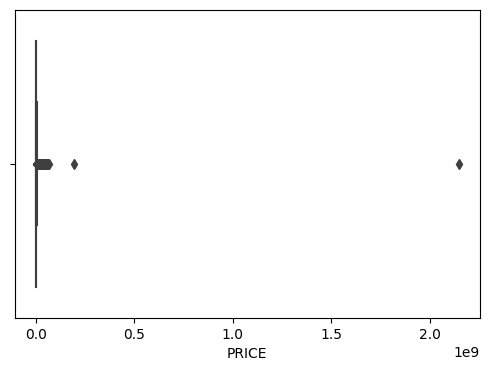

In [7]:
#Checking the outliers of Beds, Bath and Price columns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='BEDS')
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='BATH')
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='PRICE')

We can see that the above data has outliers in price column and it is left skewed. Hence for futher analysis we need to remove the outliers.

In [8]:
#Defining the Quartiles for removal of outliers
Q1=df['PRICE'].quantile(0.25)
Q3=df['PRICE'].quantile(0.75)
IQR=Q3-Q1
lowoutlier=Q1-1.5*IQR
highoutlier=Q3+1.5*IQR
totaloutlier=((df['PRICE']<lowoutlier)|(df['PRICE']>highoutlier)).sum()
print('Total outliers: ',totaloutlier)

Total outliers:  559


In [9]:
# Removal of Outliers
df_new=df[(df['PRICE']<highoutlier)&(df['PRICE']>lowoutlier)]
#validating the removal of outlier
totaloutlier = ((df_new['PRICE']<lowoutlier)|(df_new['PRICE']>highoutlier)).sum()
print("Total Number of Outliers in the price are {}".format(totaloutlier))

Total Number of Outliers in the price are 0


In [10]:
df_new.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.242000e+03,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000
mean,8.984895e+05,3.126827,2.097123,1848.546915,40.710494,-73.937130
std,6.092312e+05,2.086537,1.306940,1018.885864,0.090711,0.105707
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.499992e+05,2.000000,1.000000,1100.500000,40.632793,-73.984830
50%,7.490000e+05,3.000000,2.000000,2151.000000,40.721391,-73.940040
75%,1.195000e+06,4.000000,2.373861,2184.207862,40.770987,-73.859971
max,2.980000e+06,24.000000,24.000000,21000.000000,40.912729,-73.702450


# 3. Exploratory Data Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PRICE', ylabel='Count'>

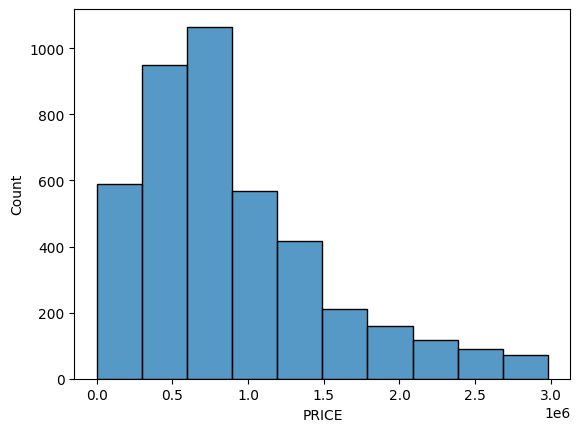

In [11]:
# checking price distribution 
sns.histplot(data=df_new,x='PRICE',bins=10)

<Axes: xlabel='PROPERTYSQFT', ylabel='PRICE'>

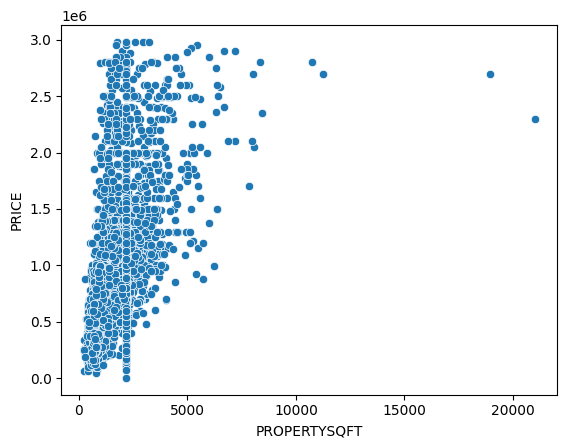

In [12]:
# Co-relation between price and property square feet
sns.scatterplot(data=df_new,x='PROPERTYSQFT',y='PRICE')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='BATH', ylabel='PRICE'>

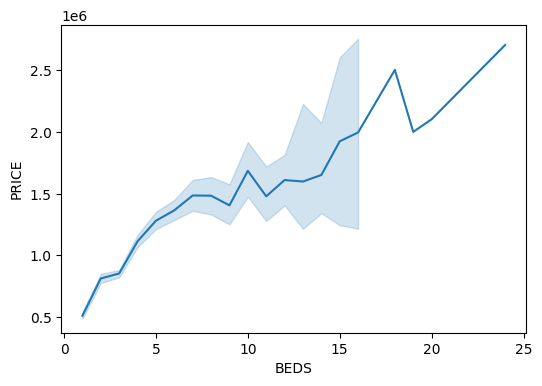

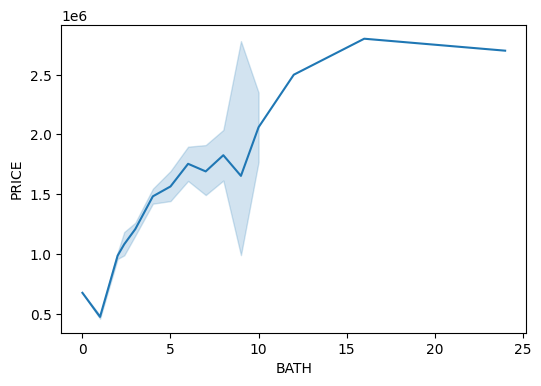

In [13]:
# House price influence by no of beds and baths
plt.figure(figsize=(6,4))
sns.lineplot(data=df_new,x='BEDS',y='PRICE')
plt.figure(figsize=(6,4))
sns.lineplot(data=df_new,x='BATH',y='PRICE')

<Axes: xlabel='PRICE', ylabel='TYPE'>

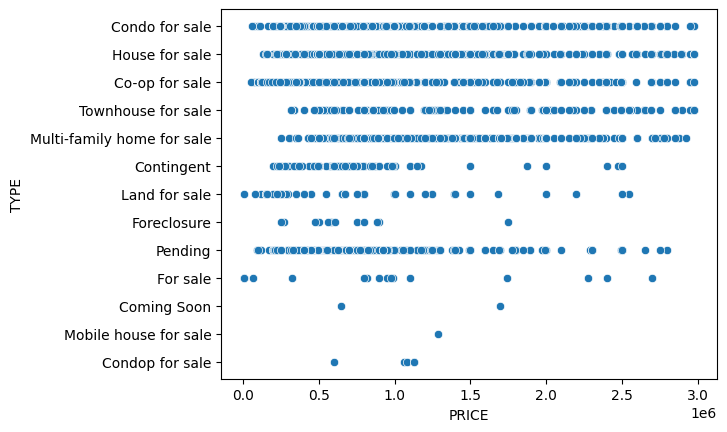

In [14]:
# overview of prices of differnt type of houses
sns.scatterplot(data=df_new,x='PRICE',y='TYPE')

In [15]:
# Extract the clean data as a csv file for designing dashboard in Power BI
df_new.to_csv(r'C:\Users\sudip\OneDrive\Desktop\NY_House_Price.csv', index=False) 

# 4. Data Visualization in Power BI

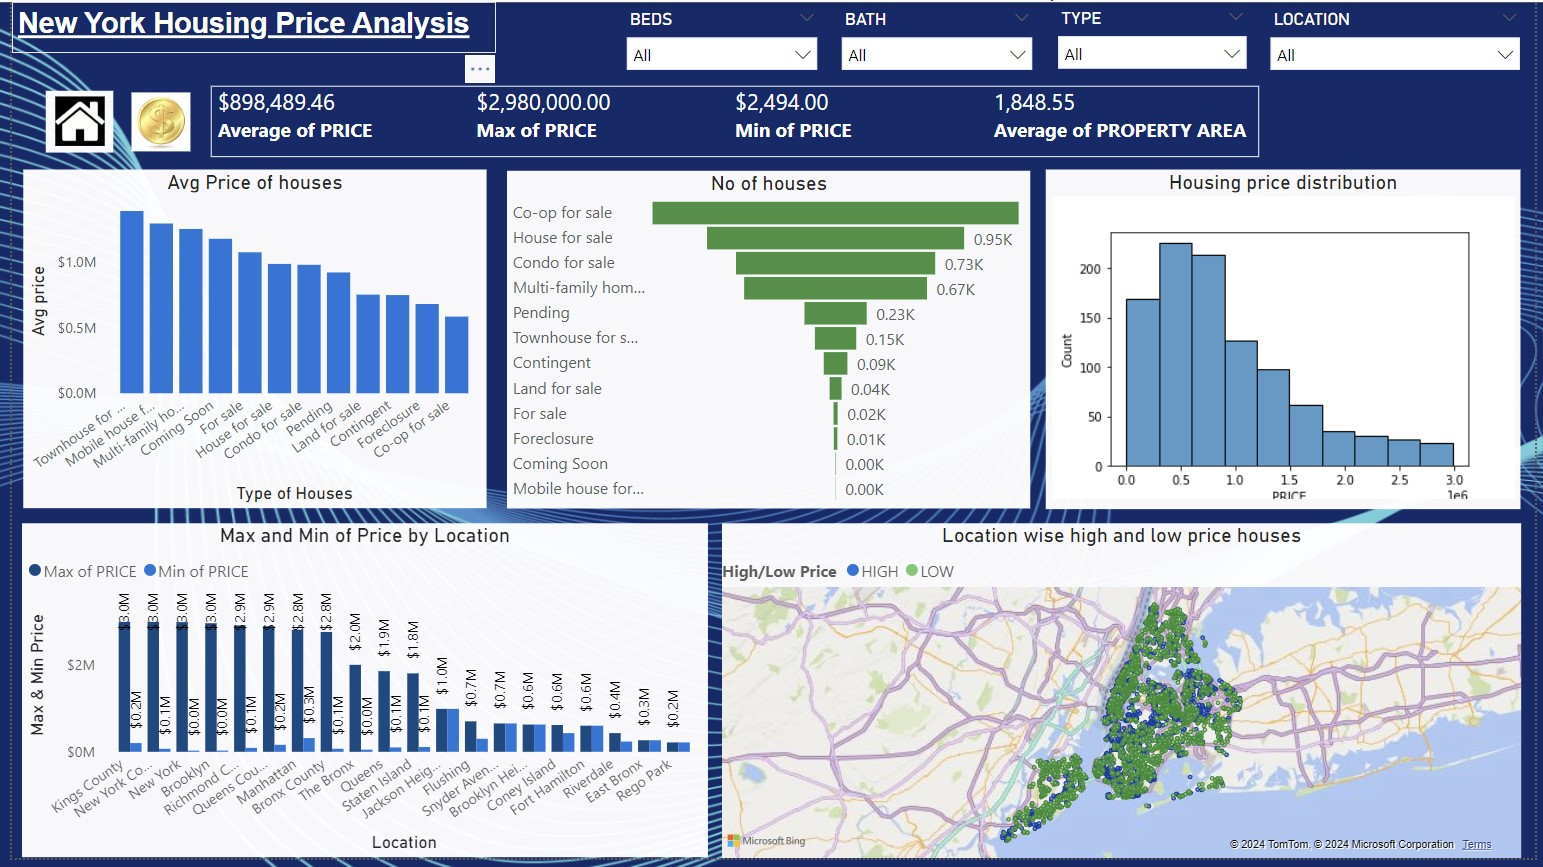